In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from PIL import Image
from sklearn.model_selection import train_test_split

# Information about the data

In [2]:
df1 = pd.read_csv('Meta.csv')
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')
df1.head(5)

There are 43 rows and 5 columns


,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22


<AxesSubplot: >

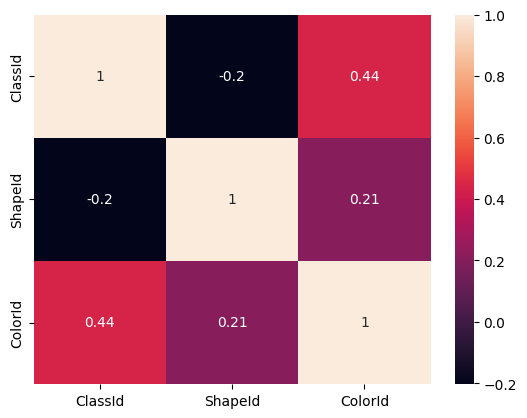

In [3]:
corr = df1.corr(numeric_only = True)
sns.heatmap(corr, annot= True)

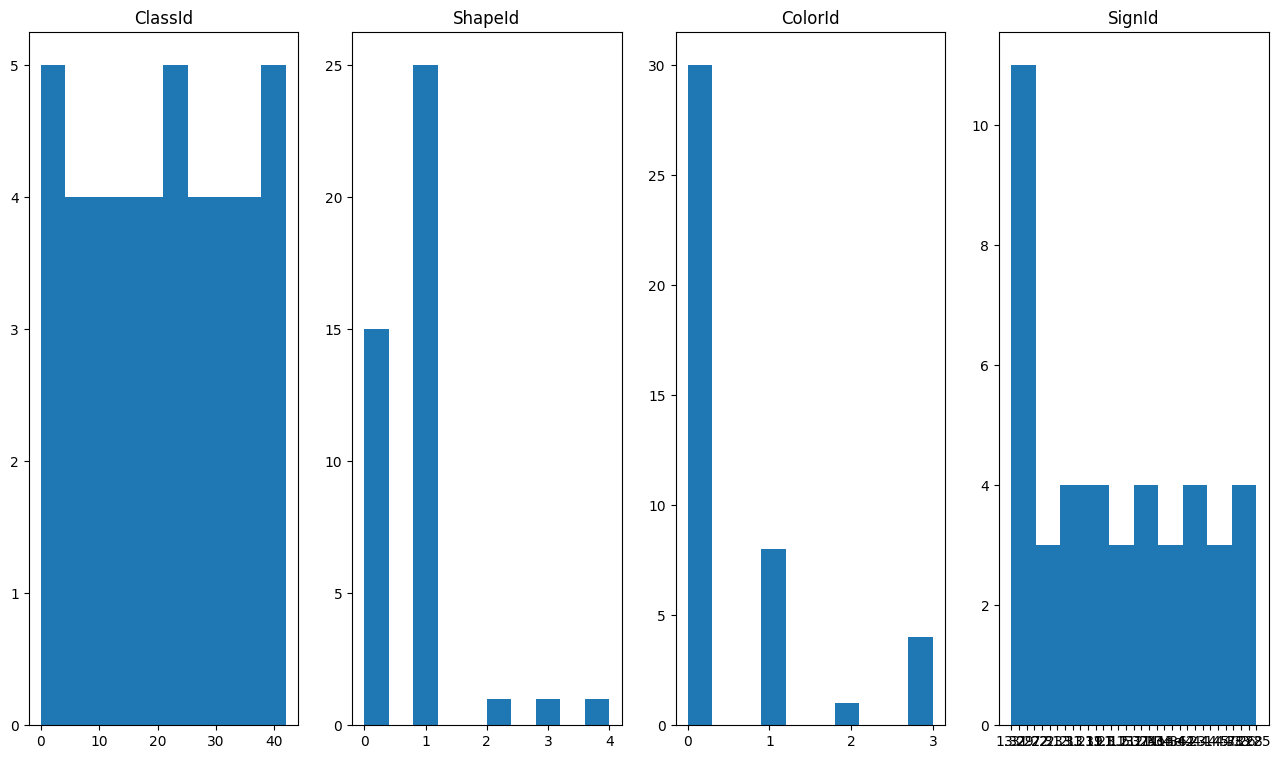

In [4]:
plt.figure(figsize = (16, 9)) 
for i in range(1, 5):
    plt.subplot(1, 4, i)
    plt.title(df1.columns[i])
    plt.hist(df1.iloc[:, i])

In [5]:
df2 = pd.read_csv('Train.csv')
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')
df2.head(5)

There are 39209 rows and 8 columns


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


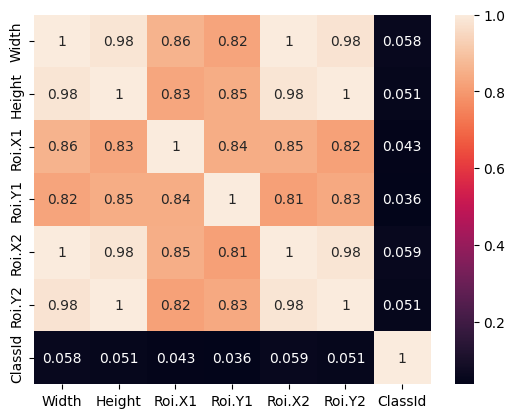

In [6]:
corr = df2.corr(numeric_only = True)
fig = sns.heatmap(corr, annot= True)
plt.savefig("df2_1.png") 

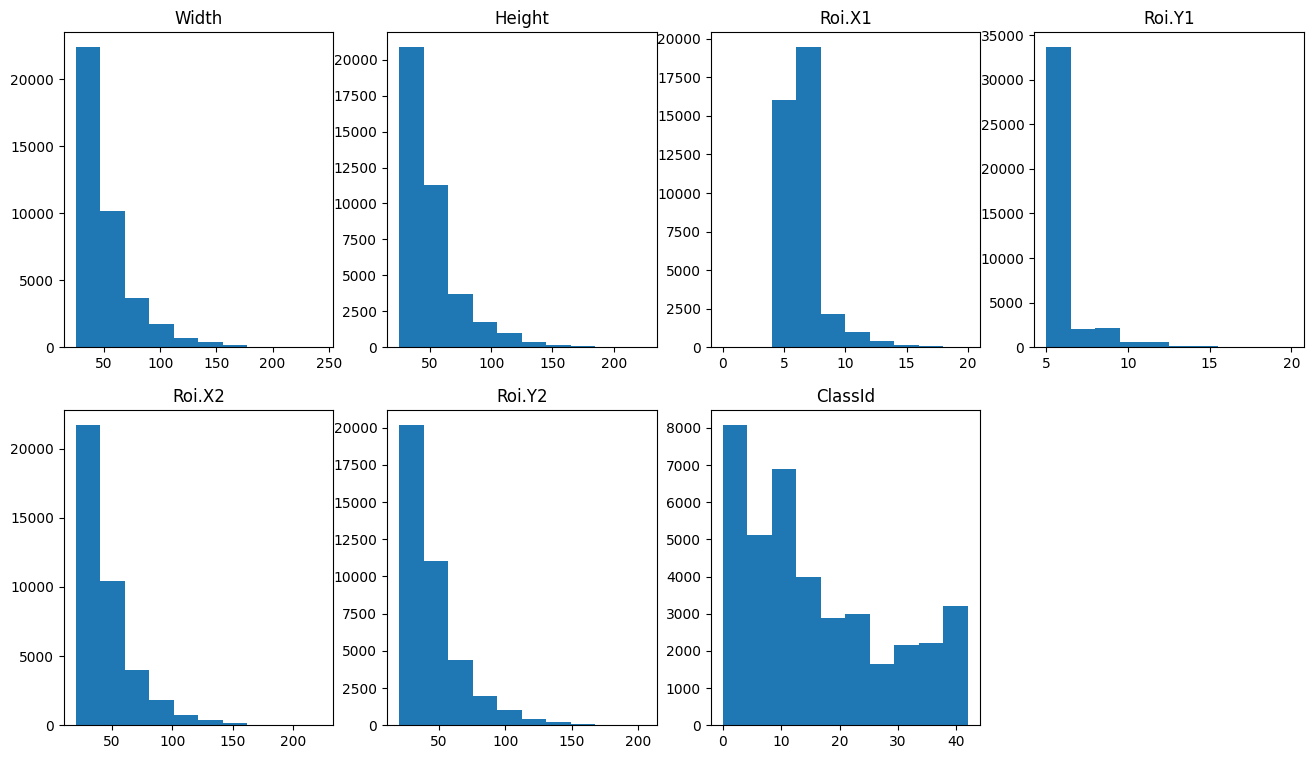

In [7]:
plt.figure(figsize = (16, 9)) 
for i in range(1, 8):
    plt.subplot(2, 4, i)
    plt.title(df2.columns[i-1])
    plt.hist(df2.iloc[:, i-1])
plt.savefig("df2_2.png") 

In [8]:
df3 = pd.read_csv('Test.csv')
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns')
df3.head(5)

There are 12630 rows and 8 columns


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


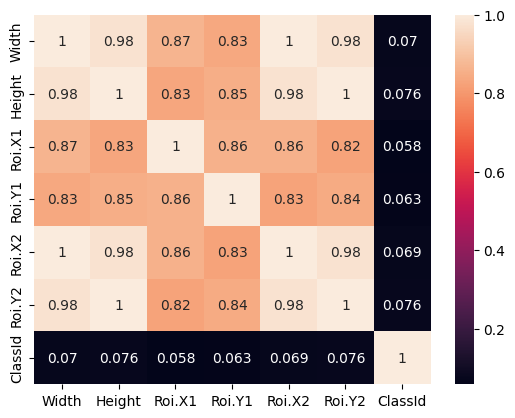

In [9]:
corr = df3.corr(numeric_only = True)
fig = sns.heatmap(corr, annot= True)
plt.savefig("df3_1.png") 

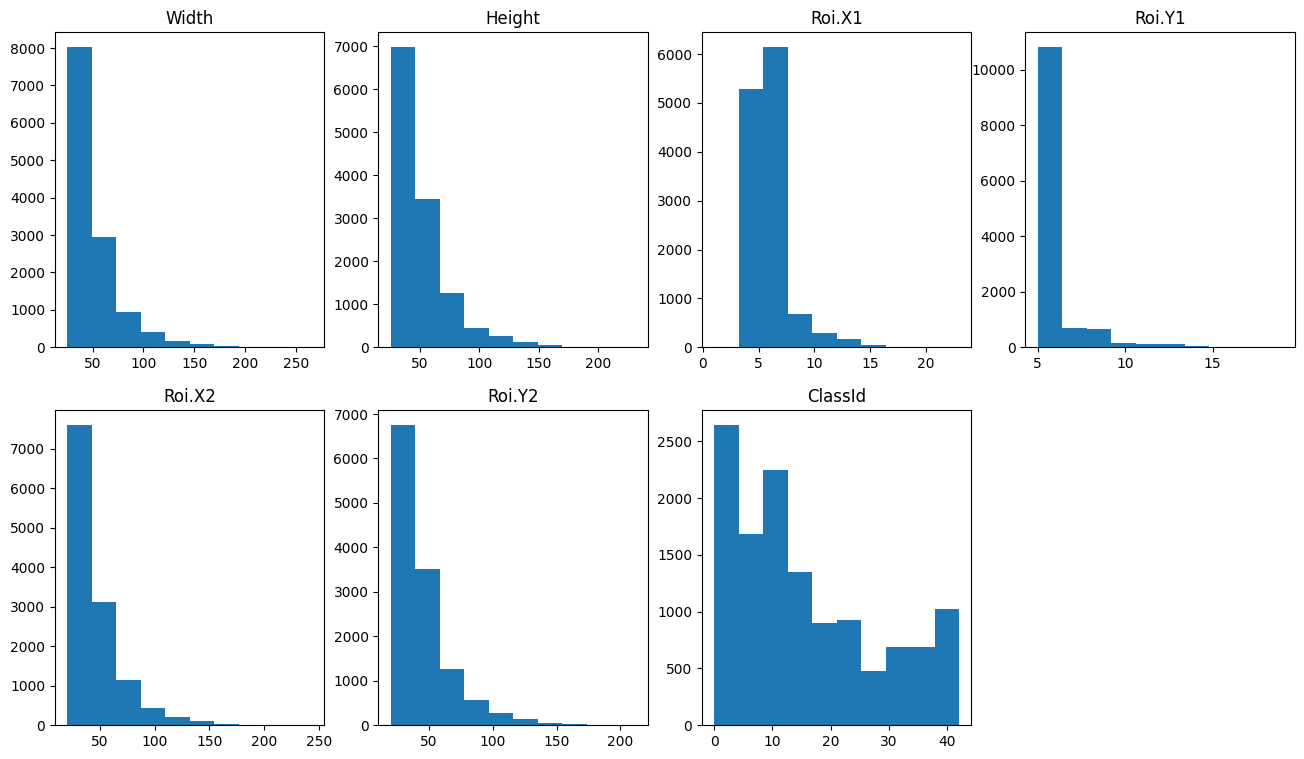

In [10]:
plt.figure(figsize = (16, 9)) 
for i in range(1, 8):
    plt.subplot(2, 4, i)
    plt.title(df3.columns[i-1])
    plt.hist(df3.iloc[:, i-1])
plt.savefig("df3_2.png") 

# Train and test data preparation

In [19]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((32, 32))
            image = np.array(image)
            image = tf.convert_to_tensor(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error loading image')
            
data = np.array(data)
labels = np.array(labels)

In [20]:
print(data.shape, labels.shape)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


# Training and evaluating of model 1

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape = x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate = 0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
epochs = 15
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/15
491/491 [==============================] - 50s 100ms/step - loss: 2.1693 - accuracy: 0.4531 - val_loss: 0.6893 - val_accuracy: 0.8363
Epoch 2/15
491/491 [==============================] - 49s 100ms/step - loss: 0.8763 - accuracy: 0.7443 - val_loss: 0.3592 - val_accuracy: 0.9046
Epoch 3/15
491/491 [==============================] - 49s 100ms/step - loss: 0.6693 - accuracy: 0.8025 - val_loss: 0.2952 - val_accuracy: 0.9214
Epoch 4/15
491/491 [==============================] - 49s 101ms/step - loss: 0.5418 - accuracy: 0.8363 - val_loss: 0.2064 - val_accuracy: 0.9431
Epoch 5/15
491/491 [==============================] - 49s 100ms/step - loss: 0.4631 - accuracy: 0.8594 - val_loss: 0.1776 - val_accuracy: 0.9522
Epoch 6/15
491/491 [==============================] - 50s 101ms/step - loss: 0.4596 - accuracy: 0.8629 - val_loss: 0.1438 - val_accuracy: 0.9652
Epoch 7/15
491/491 [==============================] - 50s 101ms/step - loss: 0.3965 - accuracy: 0.8805 - val_loss: 0.1432 - val_ac

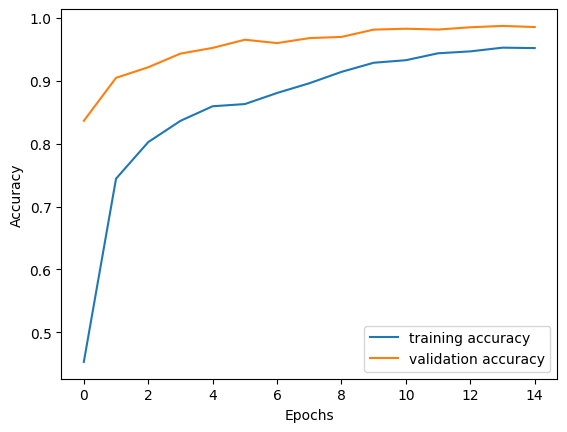

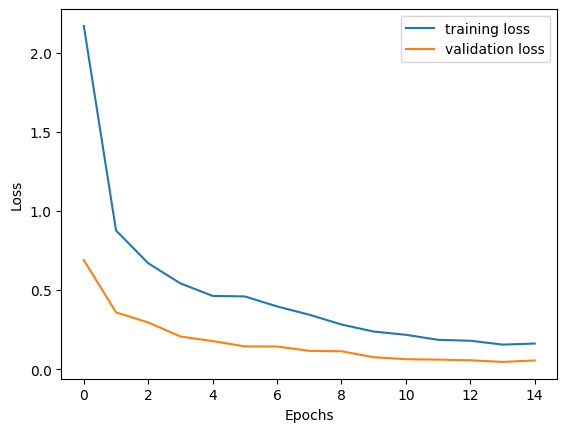

In [32]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig("model_his1.png")

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("model_his2.png")

In [16]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
x_test=np.array(data)
pred = np.argmax(model.predict(x_test), axis = -1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

#References
#https://stackoverflow.com/questions/71874695/valueerror-classification-metrics-cant-handle-a-mix-of-multiclass-and-continuo

395/395 [==============================] - 5s 11ms/step
0.9481393507521774


# Training and evaluating pretrained model

In [21]:
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 32, 3)
)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(43, activation='softmax')

pre_model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [22]:
pre_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_train_pre = np.asarray(x_train).astype(np.float32)
y_train_pre = np.asarray(y_train).astype(np.float32)
x_test_pre = np.asarray(x_test).astype(np.float32)

epochs = 10
history_pre = pre_model.fit(x_train_pre, y_train_pre, batch_size=64, epochs=epochs, validation_data=(x_test_pre, y_test))

Epoch 1/10
491/491 [==============================] - 784s 2s/step - loss: 3.3193 - accuracy: 0.1072 - val_loss: 2.2554 - val_accuracy: 0.2715
Epoch 2/10
491/491 [==============================] - 707s 1s/step - loss: 1.3140 - accuracy: 0.5607 - val_loss: 0.6037 - val_accuracy: 0.7967
Epoch 3/10
491/491 [==============================] - 629s 1s/step - loss: 0.4169 - accuracy: 0.8659 - val_loss: 0.2771 - val_accuracy: 0.9257
Epoch 4/10
491/491 [==============================] - 627s 1s/step - loss: 0.1782 - accuracy: 0.9506 - val_loss: 0.0983 - val_accuracy: 0.9779
Epoch 5/10
491/491 [==============================] - 629s 1s/step - loss: 0.1774 - accuracy: 0.9559 - val_loss: 0.1528 - val_accuracy: 0.9631
Epoch 6/10
491/491 [==============================] - 628s 1s/step - loss: 0.1021 - accuracy: 0.9765 - val_loss: 0.3004 - val_accuracy: 0.9028
Epoch 7/10
491/491 [==============================] - 629s 1s/step - loss: 0.1848 - accuracy: 0.9562 - val_loss: 0.0791 - val_accuracy: 0.9819

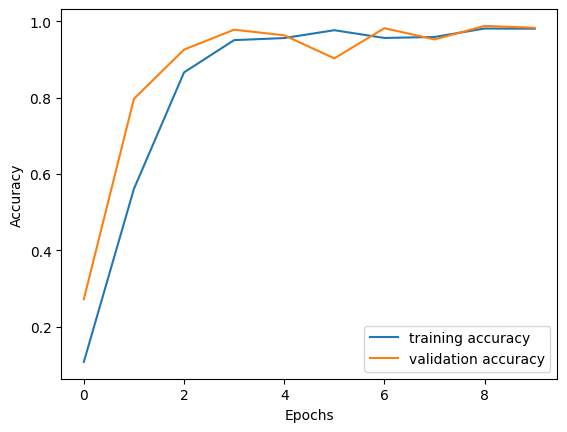

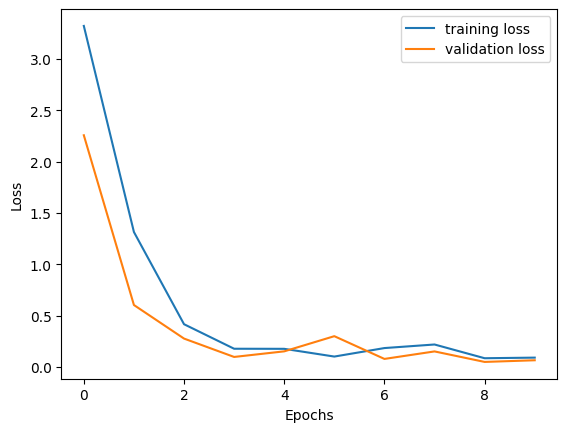

In [33]:
plt.figure(0)
plt.plot(history_pre.history['accuracy'], label = 'training accuracy')
plt.plot(history_pre.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("premodel_his1.png")

plt.figure(1)
plt.plot(history_pre.history['loss'], label = 'training loss')
plt.plot(history_pre.history['val_loss'], label = 'validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.savefig("premodel_his2.png")

In [28]:
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))
x_test=np.array(data)
pre_pred = np.argmax(model.predict(x_test), axis = -1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pre_pred))

395/395 [==============================] - 3s 8ms/step
0.9481393507521774


In [23]:
model.save('traffic_classifier.h5')